# Simple Analytics of the Casual section of roleplayerguild.com
*"It's a capital mistake to theorize before one has enough data. Eventually, you'll end up twisting facts to suit theories, instead of theories to suit facts."* **—Sherlock Holmes**

In [1]:
from bs4 import BeautifulSoup as bs
import requests as rq

with rq.get('https://www.roleplayerguild.com/forums/4-casual-roleplay') as source:
    soup = bs(source.text, 'lxml')
topics = soup.find_all('a', class_='topic-title-link')
labels = soup.find_all('span', class_='label label-default')
dates = soup.find_all('abbr', class_='ago')
num_of_replies = soup.find_all('span', class_='text-muted')

In [2]:
for i in range(2, 101):
    with rq.get(f'https://www.roleplayerguild.com/forums/4-casual-roleplay?page={i}') as source:
        soup_2 = bs(source.text, 'lxml')
        topics_2 = soup_2.find_all('a', class_='topic-title-link')
        labels_2 = soup_2.find_all('span', class_='label label-default')
        dates_2 = soup_2.find_all('abbr', class_='ago')
        num_of_replies_2 = soup_2.find_all('span', class_='text-muted')
        topics += topics_2
        labels += labels_2
        dates += dates_2
        num_of_replies += num_of_replies_2

In [3]:
with rq.get('https://www.roleplayerguild.com/roleplays') as source:
    soup_3 = bs(source.text, 'lxml')

match = soup_3.find_all('span', class_='label label-default')

tags_list = []

for item in match:
    if item.text.strip() not in tags_list:
        tags_list.append(item.text.strip())

In [4]:
tag_appearance = {}

for tag in tags_list:
    key = tag
    value = 0

    for label in labels:
        if label.text == tag:
            value += 1

    tag_appearance[key]=value

In [5]:
a, b, c = 'Tag', 'Topics with tag', '% of Topics with Tag'
print(f'{a:<20}\t{b:>12}\t{c:>5}')

for tag, quant in tag_appearance.items():
    percent = f'{((quant/len(topics))*100):.2f}'
    print(f'{tag:<20}\t{quant:>15}\t{percent:>20}')

Tag                 	Topics with tag	% of Topics with Tag
Casual              	              0	                0.00
Small Group         	            694	               27.76
Fantasy             	           1169	               46.76
18+                 	            607	               24.28
Advanced            	            317	               12.68
Military            	            325	               13.00
Steampunk           	             77	                3.08
Anime/Manga         	            616	               24.64
Medieval            	            322	               12.88
Arena               	             55	                2.20
Free                	             53	                2.12
Large Group         	           1458	               58.32
Modern              	            830	               33.20
Fandom              	            724	               28.96
Superhero           	            368	               14.72
1x1                 	             62	                2.48
Sci-Fi        

In [6]:
tag_quantity = []

for tag, num in tag_appearance.items():
    tag_quantity.append(num)

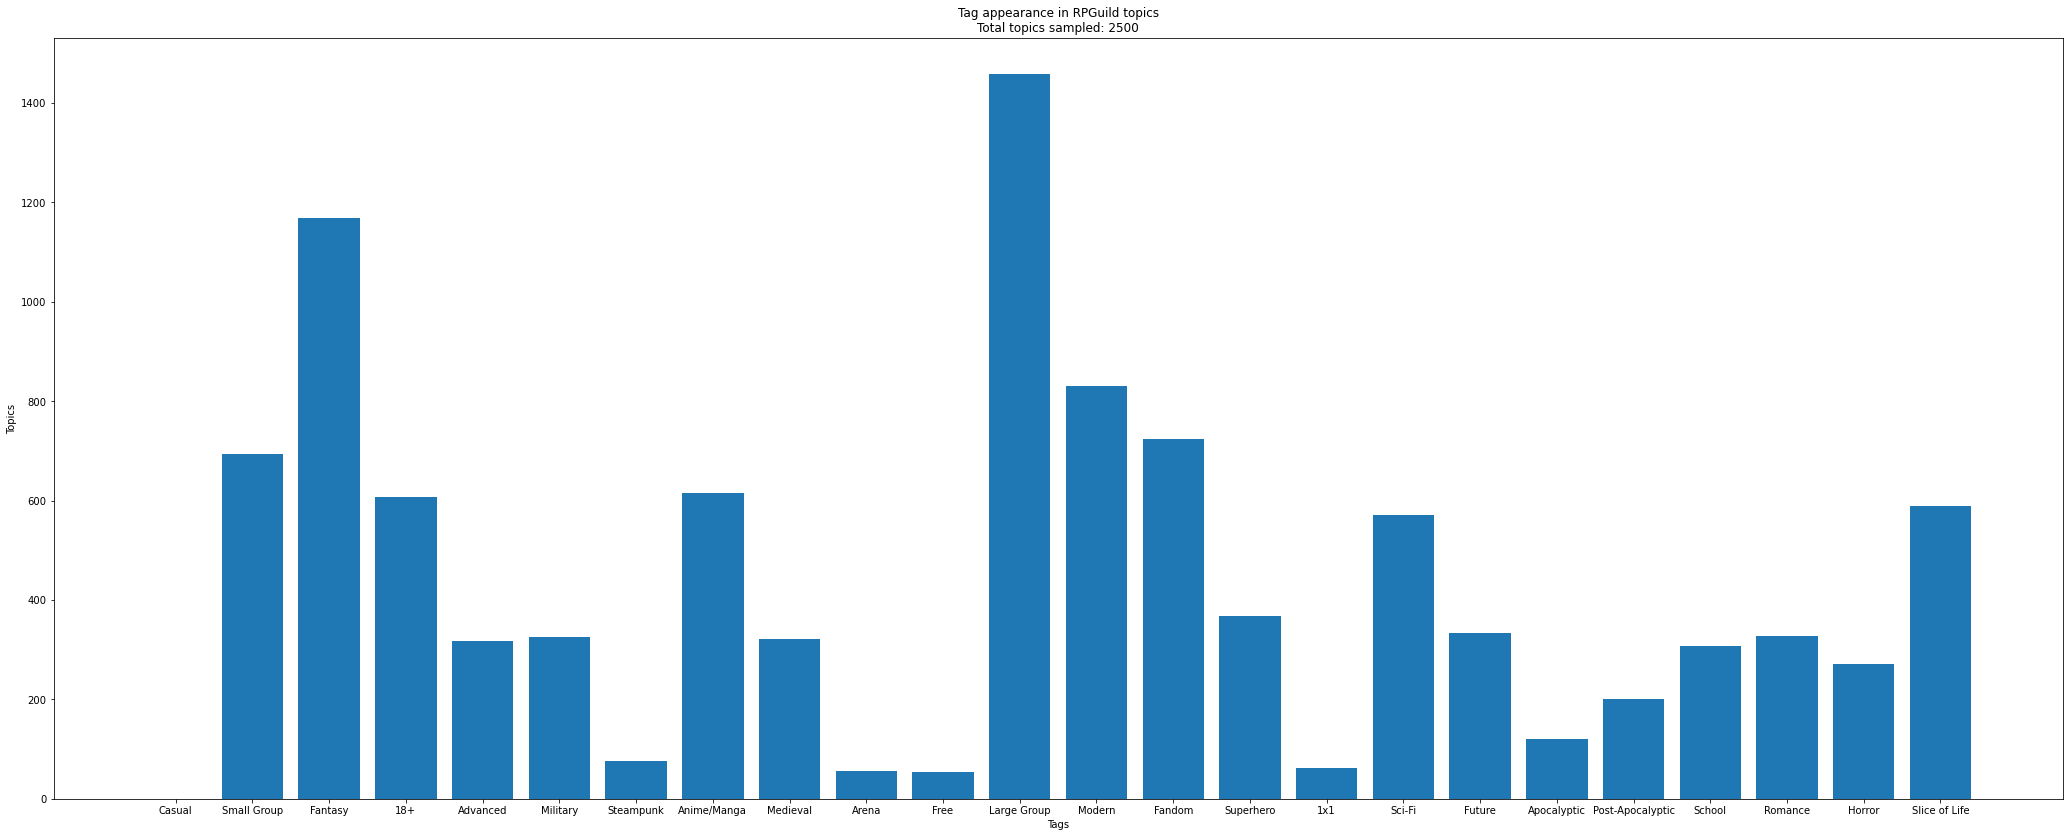

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (36, 14)
plt.title(f'Tag appearance in RPGuild topics\nTotal topics sampled: {len(topics)}')
plt.ylabel('Topics')
plt.xlabel('Tags')
plt.bar(tags_list, tag_quantity)
plt.show()

In [8]:
creation_dates, last_posted = [], []

for i in range(len(dates)):
    if i%2 == 0:
        dat = str(dates[i]).split('title=')[1].split('>')[0]
        creation_dates.append(dt)
    if i%2 != 0:
        dat = str(dates[i]).split('title=')[1].split('>')[0]
        last_posted.append(dat)

In [37]:
month_year_of_creation = []
for i in range(len(creation_dates)):
    month = creation_dates[i].split(' ')[1]
    year = creation_dates[i].split(' ')[2]
    if (f'{month} {year}') not in month_year_of_creation:
        month_year_of_creation.append(f'{month} {year}')

In [58]:
import datetime as dt

topics_created_by_date = {}
for dat in month_year_of_creation:
    key = dt.datetime.strptime(dat, '%b %Y').date()
    value = 0

    for i in range(len(creation_dates)):
        month = creation_dates[i].split(' ')[1]
        year = creation_dates[i].split(' ')[2]
        if (f'{month} {year}') == dat:
            value += 1
    
    topics_created_by_date[key]=value

sorted_topics_created_by_date = dict(sorted(topics_created_by_date.items(), key=lambda item: item[0]))

In [59]:
print('Date\t Num of Topics')
for x, y in sorted_topics_created_by_date.items():
    print(f'{str(x)[:7]}\t{y:>14}')

Date	 Num of Topics
2014-01	             7
2014-02	             2
2014-03	             2
2014-05	             2
2014-06	             1
2014-07	             2
2014-08	             1
2014-10	             1
2014-11	             2
2014-12	             2
2015-01	             3
2015-02	             2
2015-03	             2
2015-04	             5
2015-05	             5
2015-06	             5
2015-07	             2
2015-08	             4
2015-09	             6
2015-10	             1
2015-11	             3
2015-12	             5
2016-01	             3
2016-02	             2
2016-03	            10
2016-04	             6
2016-05	            13
2016-06	             6
2016-07	             8
2016-08	             8
2016-09	            10
2016-10	             4
2016-11	             8
2016-12	            13
2017-01	            11
2017-02	            12
2017-03	            25
2017-04	            32
2017-05	            59
2017-06	            92
2017-07	            93
2017-08	           109
2017-09	      

<function matplotlib.pyplot.show(close=None, block=None)>

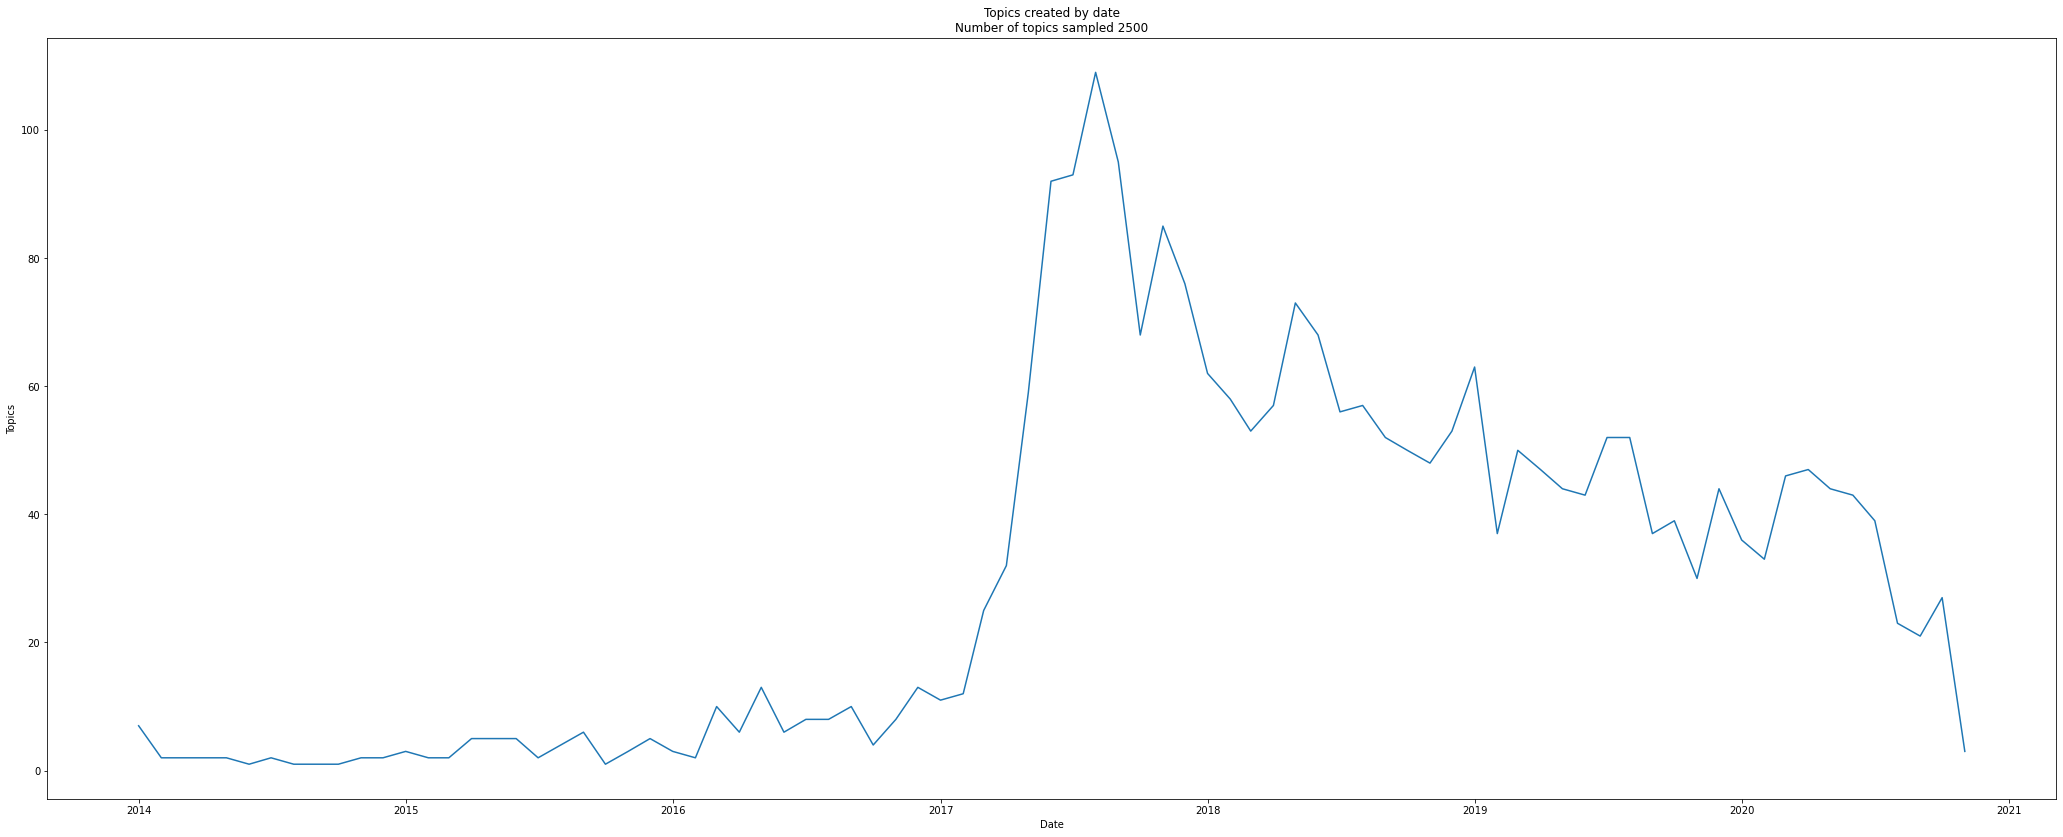

In [61]:
plt.title(f'Topics created by date\nNumber of topics sampled {len(topics)}')
plt.xlabel('Date')
plt.ylabel('Topics')
plt.plot(*zip(*sorted_topics_created_by_date.items()))
plt.show